<a href="https://colab.research.google.com/github/ojoilesanmi/Risk-Analysis-with-R/blob/New_data_test/loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan Prediction Project

In [6]:
install.packages('randomForest')
install.packages('rpart')
install.packages('cluster')
install.packages('recipes')
install.packages('gridExtra')
install.packages('caret', dependencies = TRUE)
install.packages('xgboost')
install.packages('recipes')
install.packages('rsample')
install.packages('e1071')
install.packages('kernlab')
install.packages('DMwR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘gower’, ‘ipred’, ‘timeDate’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘data.table’, ‘foreach’, ‘ModelMetrics’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘future

In [3]:
#Libraries
library('tidyverse')
library('DMwR')
library('randomForest')
library('rpart')
library('cluster')
library('recipes')
library('gridExtra')
library('caret')
library('xgboost')
library('recipes')
library('rsample')
library('e1071')
library('kernlab')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘gridExtra’




In [5]:
#load data
data <- read.csv('/loan.csv')

In [6]:
data$id <- NULL
data$year <- NULL
data$issue_d <- NULL
data$final_d <- NULL

In [7]:
data$annual_inc <- data$annual_inc * 410
data$loan_amount <- data$loan_amount * 410
data$dti <- data$dti * 410
data$total_pymnt <- data$total_pymnt * 410
data$total_rec_prncp <-  data$total_rec_prncp * 410
data$recoveries <-data$recoveries * 410
data$installment <- data$installment * 410

In [8]:
data$annual_inc <- floor((data$annual_inc) / 12)


In [9]:
data <- data %>% rename(
  monthly_inc = annual_inc
)

In [10]:
data <- data %>% 
  select(-c(2,4,8,10,12,14,16,19,26))

In [ ]:
data


In [11]:
new_data <- data %>% 
  mutate_at(c(1,3,5,11,13,14,15,16,17), funs(log(1 + .))) %>%
 mutate_at(-c(10), funs(c(scale(.))))

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [12]:
new_data$home_ownership_cat <- as.factor(new_data$home_ownership_cat)
new_data$income_cat <- as.factor(new_data$income_cat)
new_data$term_cat <- as.factor(new_data$term_cat)
new_data$application_type_cat <- as.factor(new_data$application_type_cat)
new_data$purpose_cat <- as.factor(new_data$purpose_cat)
new_data$interest_payment_cat <- as.factor(new_data$interest_payment_cat)
new_data$loan_condition_cat <- as.factor(new_data$loan_condition_cat)
new_data$grade_cat <- as.factor(new_data$grade_cat)

In [13]:
set.seed(100)

train_test_split <- initial_split(new_data, prop = 0.8)

train_test_split

<Analysis/Assess/Total>
<709904/177475/887379>

In [14]:
train_set <- training(train_test_split)
test_set <- testing(train_test_split)

In [15]:
#cross validation. Divide data into 10 folds and repeat it 3 times.
control <- trainControl(method="repeatedcv", number=10, repeats=3)


In [20]:
logistic_model<- train(form=loan_condition_cat~., data=train_set,method="glm", family="binomial", preProcess = c("center", "scale"),trControl=control, tuneLength = 5)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

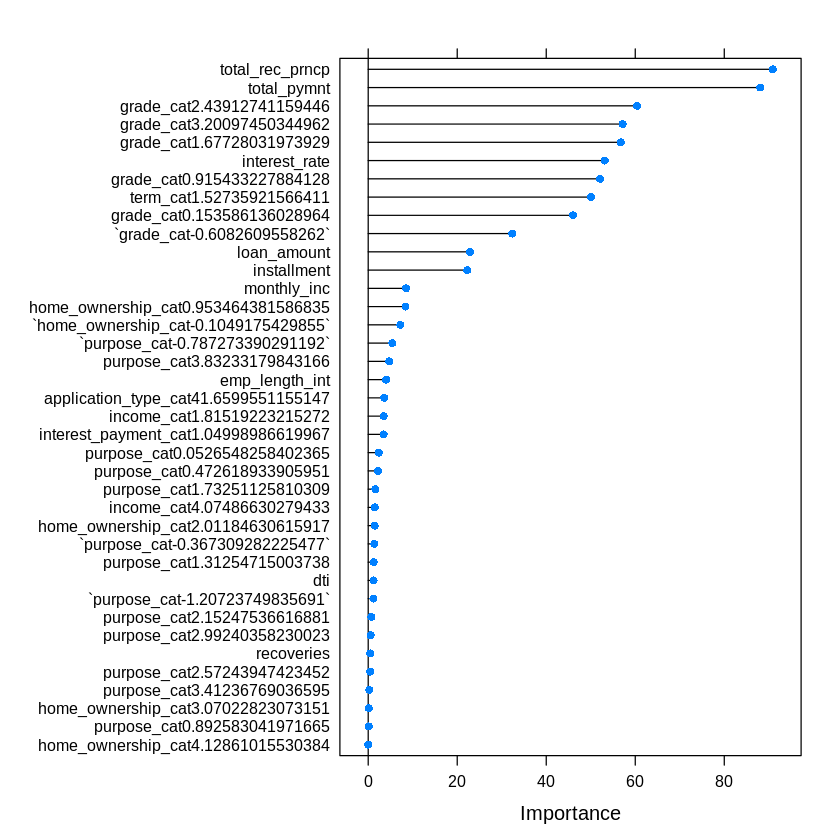

In [21]:
#helps to select important features
importance <- varImp(logistic_model, scale=FALSE)
plot(importance)

In [ ]:
train_set

In [16]:
new_train <- train_set[,-c(1,2,4,7,8,9,13,14,16)]
new_test  <- test_set[,-c(1,2,4,7,8,9,13,14,16)]

In [ ]:
new_train

In [23]:
logistic_regression <- train(form=loan_condition_cat~., data=new_train,method="glm", family="binomial", preProcess = c("center", "scale"),trControl=control, tuneLength = 5)

In [24]:
predlog <- predict(logistic_regression,new_test,type="raw")
table(predlog, new_test$loan_condition_cat)

       
predlog      0      1
      0 164105  13353
      1     13      4

In [25]:
logistic_regression_confusion_matrix<-confusionMatrix(predlog, new_test$loan_condition_cat)


In [26]:
logistic_regression_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 164105  13353
         1     13      4
                                          
               Accuracy : 0.9247          
                 95% CI : (0.9235, 0.9259)
    No Information Rate : 0.9247          
    P-Value [Acc > NIR] : 0.5346          
                                          
                  Kappa : 4e-04           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9999208       
            Specificity : 0.0002995       
         Pos Pred Value : 0.9247540       
         Neg Pred Value : 0.2352941       
             Prevalence : 0.9247387       
         Detection Rate : 0.9246654       
   Detection Prevalence : 0.9999042       
      Balanced Accuracy : 0.5001101       
                                          
       'Positive' Class : 0               
            

In [ ]:
svm<- train(form=loan_condition_cat~., data=new_train, method="svmLinear", preProcess = c("center", "scale"), trControl=control, tuneLength =5)


In [19]:
xgb.grid <- expand.grid(nrounds = 100,eta=0.3, gamma=0, max_depth=3, min_child_weight=1, subsample=1, colsample_bytree=1)


In [20]:
xgb_model <-train(loan_condition_cat~ .,data = new_train, method="xgbTree",trControl=control, tuneGrid=xgb.grid,nthread =4)


In [21]:
xgb_model

eXtreme Gradient Boosting 

709904 samples
     7 predictor
     2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 638914, 638912, 638914, 638914, 638914, 638913, ... 
Resampling results:

  Accuracy  Kappa    
  0.932713  0.2056858

Tuning parameter 'nrounds' was held constant at a value of 100
Tuning
 held constant at a value of 1
Tuning parameter 'subsample' was held
 constant at a value of 1

In [22]:
predxgb<-predict(xgb_model,new_test,type="raw")


In [23]:
#xgboost_confusion_matrix<-confusionMatrix(predxgb, new_test$loan_condition_cat)
xgboost_confusion_matrix <- confusionMatrix(table(predxgb, new_test$loan_condition_cat)) 


In [24]:
xgboost_confusion_matrix

Confusion Matrix and Statistics

       
predxgb      0      1
      0 164028  11618
      1     90   1739
                                          
               Accuracy : 0.934           
                 95% CI : (0.9329, 0.9352)
    No Information Rate : 0.9247          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2148          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9995          
            Specificity : 0.1302          
         Pos Pred Value : 0.9339          
         Neg Pred Value : 0.9508          
             Prevalence : 0.9247          
         Detection Rate : 0.9242          
   Detection Prevalence : 0.9897          
      Balanced Accuracy : 0.5648          
                                          
       'Positive' Class : 0               
                                 